In [2]:
import healpy as hp
import matplotlib.pyplot as plt
import sys
import numpy as np
from tqdm import tqdm
import pymaster as nmt
sys.path.append('../../')

In [3]:
%load_ext autoreload
%autoreload 2
from cobi.simulation import Noise, Mask

In [4]:
dir = '/global/cfs/cdirs/sobs/cosmic_birefringence/v0'
nside = 2048

# LAT

In [5]:
LatMask = Mask(dir,nside,'LAT',apo_scale=1)

Mask : INFO - Upgrading mask LAT resolution
Mask : INFO - Apodizing mask: scale 1: method: C2
Mask : INFO - Apodizing changed the fsky 0.639 -> 0.631


In [6]:
mask = LatMask.mask

In [7]:
ntod = Noise(nside=2048,fsky=LatMask.fsky,telescope='LAT',sim='TOD')
ncur = Noise(nside=2048,fsky=LatMask.fsky,telescope='LAT',sim='NC',atm_noise=True)

Noise : INFO - Noise Model: [LAT] Based on TOD and Map based simulations, directly using SO products.
Noise : INFO - Noise Model:[LAT] White + 1/f noise v3.1.1


In [8]:
nmaps_tod = ntod.noiseQU(0)
nmaps_nc = ncur.noiseQU()

In [9]:
lmax=2048

In [10]:
wrk = nmt.NmtWorkspace()
mask_f = nmt.NmtField(mask, [mask, mask], lmax=lmax, purify_b=False)
binInfo = nmt.NmtBin.from_lmax_linear(lmax, 10)
wrk.compute_coupling_matrix(mask_f, mask_f, binInfo)

def compute_master(f_a,f_b):
    cl_coupled = nmt.compute_coupled_cell(f_a, f_b)
    cl_decoupled = wrk.decouple_cell(cl_coupled)
    return cl_decoupled
    
b = binInfo.get_effective_ells()

In [11]:
q27_tod, u27_tod = nmaps_tod[6]
q27_cur, u27_cur = nmaps_nc[6]

In [12]:
f27_tod = nmt.NmtField(mask, [q27_tod,u27_tod],lmax=lmax, purify_b=False)
f27_cur = nmt.NmtField(mask, [q27_cur,u27_cur],lmax=lmax, purify_b=False)


In [13]:
ee27_tod,_,_,bb27_tod = compute_master(f27_tod,f27_tod)
ee27_cur,_,_,bb27_cur = compute_master(f27_cur,f27_cur)

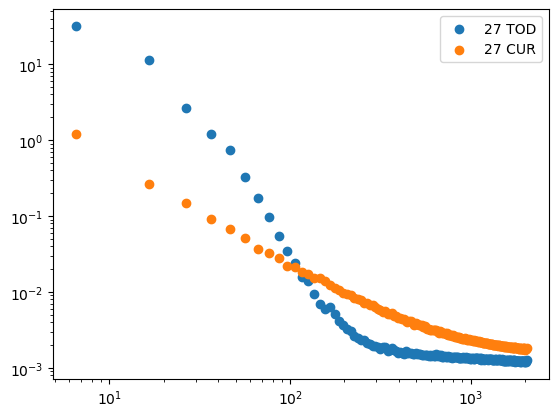

In [14]:

plt.scatter(b,ee27_tod,label='27 TOD')
plt.scatter(b,ee27_cur,label='27 CUR')
plt.loglog()
plt.legend()

# SAT

In [15]:
nside = 512

In [16]:
SatMask = Mask(dir,nside,'SAT',apo_scale=1)

Mask : INFO - Downgrading mask SAT resolution
Mask : INFO - Apodizing mask: scale 1: method: C2
Mask : INFO - Apodizing changed the fsky 0.117 -> 0.113


In [17]:
mask = SatMask.mask

In [53]:
ntod = Noise(nside=512,fsky=SatMask.fsky,telescope='SAT',sim='TOD')
ncur = Noise(nside=512,fsky=SatMask.fsky,telescope='SAT',sim='NC',atm_noise=True)

/pscratch/sd/l/lonappan/software_pkgs/cb/lib/python3.10/site-packages/so_models_v3/SO_Noise_Calculator_Public_v3_1_1.py:215: RuntimeWarning: divide by zero encountered in scalar divide
  cov_weight[i,j] += ( tube_count * N_tels /
Noise : INFO - Noise Model: [SAT] Based on TOD and Map based simulations, directly using SO products.
Noise : INFO - Noise Model:[SAT] White + 1/f noise v3.1.1


In [54]:
nmaps_tod = ntod.noiseQU(0)
nmaps_nc = ncur.noiseQU()

In [55]:
lmax=1000

In [56]:
wrk = nmt.NmtWorkspace()
mask_f = nmt.NmtField(mask, [mask, mask], lmax=lmax, purify_b=False)
binInfo = nmt.NmtBin.from_lmax_linear(lmax, 10)
wrk.compute_coupling_matrix(mask_f, mask_f, binInfo)

def compute_master(f_a,f_b):
    cl_coupled = nmt.compute_coupled_cell(f_a, f_b)
    cl_decoupled = wrk.decouple_cell(cl_coupled)
    return cl_decoupled
    
b = binInfo.get_effective_ells()

In [57]:
q27_tod, u27_tod = nmaps_tod[0]
q27_cur, u27_cur = nmaps_nc[0]

In [58]:
f27_tod = nmt.NmtField(mask, [q27_tod,u27_tod],lmax=lmax, purify_b=False)
f27_cur = nmt.NmtField(mask, [q27_cur,u27_cur],lmax=lmax, purify_b=False)

In [59]:
ee27_tod,_,_,bb27_tod = compute_master(f27_tod,f27_tod)
ee27_cur,_,_,bb27_cur = compute_master(f27_cur,f27_cur)

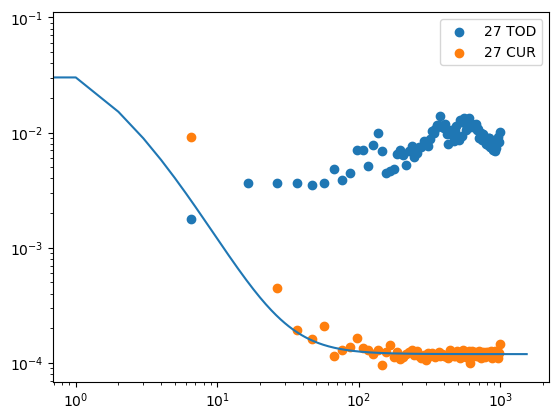

In [52]:
plt.scatter(b,ee27_tod,label='27 TOD')
plt.scatter(b,ee27_cur,label='27 CUR')
plt.loglog(ncur.Nell['27']*2)
plt.loglog()
plt.legend()

In [27]:
ncur.Nell['27'][2]

0.007574791073144307